In [53]:
!kaggle competitions download -c spaceship-titanic

HTTPSConnectionPool(host='storage.googleapis.com', port=443): Max retries exceeded with url: /kaggle-competitions-data/kaggle-v2/34377/3220602/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1767137921&Signature=fcrw8DTTbPdumcgzlYJQaV7VQyoMkGtmIfuT6mLZtHNseg5ORc32UqUVXOQgpTlCYli3JpnzxmqEezT3m9sZbO3tmp%2FZJ4DUU%2BIMKXSycXrEO%2BTwz0VNNfN01hurh2%2Fuc%2B05cqTpNSS4fZRzi%2BhJrLsOfzddzCCMOZ6V%2FK5ih3vj5%2Bg0NmHU5uwb1tpQyVScRPXkBr66YgZDQesWsJaUKw51tRSUN%2B%2F2qxcC8M2uPJSTX9je5IhEzT8zkwkl6TiCXYeQs2ZhAixRZbr0lUexmgDpxb2lKDwb3J%2F9ZGpjW%2FgwdXG9tvyt03qHGaGbIC1mGhHLrP2QJXXjlNG%2Ff9HQWg%3D%3D&response-content-disposition=attachment%3B+filename%3Dspaceship-titanic.zip (Caused by SSLError(SSLZeroReturnError(6, 'TLS/SSL connection has been closed (EOF) (_ssl.c:1147)')))


In [54]:
import zipfile
import os
import pandas as pd

# 解压数据集
path = "spaceship-titanic"
if not os.path.exists(path=path):
    os.makedirs(name=path)
fp = zipfile.ZipFile("spaceship-titanic.zip", 'r')
fp.extractall(path)

# 读取数据
train_csv = pd.read_csv(filepath_or_buffer=f"{path}/train.csv")
tests_csv = pd.read_csv(filepath_or_buffer=f"{path}/test.csv")
train_csv

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [55]:
# 初步组合数据
# 分析特征-Name：游客名称，姓名特征对预测没有影响，删除处理
all_features = pd.concat((train_csv.iloc[:, 0:-2], tests_csv.iloc[:, 0:-1])) # 删除name和labels以及PassengerId等无关特征
all_features = all_features.reset_index(drop=True) # 重置索引避免重复
all_features[1:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0


In [56]:
import matplotlib.pyplot as plt
from pandas import Series

def groupby_cate(data: Series) -> dict[str, float]:
    """统计离散数据频数

    Args:
        data (list): _description_

    Returns:
        dict[str, float]: _description_
    """
    cate_frequent = {}
    for cate in data:
        if cate not in cate_frequent:
            cate_frequent[cate] = 1
        else:
            cate_frequent[cate] = cate_frequent[cate] + 1
    return cate_frequent

In [57]:
# 分析特征-HomePlanet 将nan设置为Earth 采用one-hot encoding处理本列数据
all_features['HomePlanet'] = all_features['HomePlanet'].fillna('Earth')
print(groupby_cate(all_features['HomePlanet']))

{'Europa': 3133, 'Earth': 7153, 'Mars': 2684}


In [58]:
# 分析特征-CryoSleep（处理NaN，存在消费的CryoSleep一定是False，另外被限制在船舱内的自救难度可能增加）
for index, row in all_features[all_features['CryoSleep'].isna() == True].iterrows():
    if row.RoomService > 0 or row.FoodCourt > 0 or row.ShoppingMall > 0 or row.Spa > 0 or row.VRDeck > 0:
        all_features.loc[index, 'CryoSleep'] = False
    else:
        all_features.loc[index, 'CryoSleep'] = False
all_features['CryoSleep'] = all_features['CryoSleep'].astype(int)
all_features[all_features['CryoSleep'].isna() == True]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck


In [59]:
# 分析特征-Cabin：客舱，乘客入住的客舱编号，格式为甲板/编号/侧、P表示左舷、S表示右舷
# 分解特征数据创建新的特征，分别是甲板、编号（不作为数字）、侧进行one-hot encoding
all_features['Cabin'].value_counts()
all_features[['Deck', 'Num', 'Side']] = all_features['Cabin'].str.split('/', expand=True)
del all_features['Cabin']
del all_features['Num']
all_features['Deck'] = (all_features['Deck'].fillna('F')).map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})
all_features['Side'] = (all_features['Side'].fillna('S')).map({'P':0, 'S':1})
all_features[1:3]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,5,1
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,1


In [60]:
# 分析特征-Age，前者缺失值使用众数补充，后者使用均值处理，随后对年龄进行分箱处理
all_features['Age'].value_counts()
# 根据年龄分布情况进行分箱
age_bins = [0, 8, 18, 35, 55, 100]
age_labels = ['儿童', '少年', '青年', '中年', '老年']
all_features['Age'] = pd.cut(all_features['Age'], bins=age_bins, labels=age_labels)
all_features['Age'] = all_features['Age'].fillna('青年')
all_features['Age'] = (all_features['Age'].map({'儿童': 0,'少年': 1,'青年': 2,'中年': 3,'老年': 4})).astype(int)
all_features['Age'].value_counts()


Age
2    6785
3    3047
1    1843
0     657
4     638
Name: count, dtype: int64

In [61]:
all_features['Destination'] = (all_features['Destination'].fillna('TRAPPIST-1e')).astype(str)

In [62]:
# 分析特征-VIP，使用众数填充
all_features['VIP'] = all_features['VIP'].fillna(False)
all_features['VIP'].value_counts()
all_features['VIP'] = all_features['VIP'].astype(int)

In [63]:
# 分析特征-RoomService、FoodCount、ShoppingMall、Spa、VRDeck等消费特征对获救无关并且大多数为0，可先考虑删除处理，若对分数存在影响则进行标准化处理
del all_features['RoomService']
del all_features['FoodCourt']
del all_features['ShoppingMall']
del all_features['Spa']
del all_features['VRDeck']
all_features[1:3]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side
1,0002_01,Earth,0,TRAPPIST-1e,2,0,5,1
2,0003_01,Europa,0,TRAPPIST-1e,4,1,0,1


In [64]:
# 分析特征-PassengerId，其中包含了旅行团信息，是否在旅行团中可能对获救存在影响，可分解旅行团，并创建是否抱团特征
all_features['GroupID'] = all_features['PassengerId'].str.split('_').str[0]
all_features['IsAlone'] = (all_features.groupby('GroupID').transform('size') == 1).astype(int)
del all_features['GroupID']
del all_features['PassengerId']
all_features[1:3]

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,IsAlone
1,Earth,0,TRAPPIST-1e,2,0,5,1,1
2,Europa,0,TRAPPIST-1e,4,1,0,1,0


In [65]:
# 特征工程结束-将全部离散型特征进行one-hot-encoding编码，特征数量会增加（考虑编码方式）
all_features = pd.get_dummies(all_features, dummy_na=False, dtype=int)
all_features

,CryoSleep,Age,VIP,Deck,Side,IsAlone,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,3,0,1,0,1,0,1,0,0,0,1
1,0,2,0,5,1,1,1,0,0,0,0,1
2,0,4,1,0,1,0,0,1,0,0,0,1
3,0,2,0,0,1,0,0,1,0,0,0,1
4,0,1,0,5,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,2,0,6,1,0,1,0,0,0,0,1
12966,0,3,0,5,1,1,1,0,0,0,0,1
12967,1,2,0,3,0,1,0,0,1,1,0,0
12968,0,2,0,3,0,1,0,1,0,0,0,1


In [66]:
# 继续进行标准化

In [67]:
import torch
from torch import nn
# 创建张量features、labels
train_features = torch.tensor(data=all_features[:train_csv.shape[0]].values, dtype=torch.float).to("cuda")
train_labels = torch.tensor(data=train_csv['Transported'].values, dtype=torch.long).to("cuda")
test_features = torch.tensor(data=all_features[train_csv.shape[0]:].values, dtype=torch.float).to("cuda")
train_features.shape

torch.Size([8693, 12])

In [68]:
# 创建模型
class Net(nn.Module):
    def __init__(self):
        """构造函数
        """
        super().__init__()
        hiddent = nn.Linear(train_features.shape[1], 6)
        nn.init.normal_(hiddent.weight, mean=0, std=0.1) # 参数初始化
        output = nn.Linear(6, 2)
        nn.init.normal_(output.weight, mean=0, std=0.1)
        self.net = nn.Sequential(
            hiddent, nn.ReLU(),
            output
        )
        # linear = nn.Linear(train_features.shape[1], 2)
        # self.net = nn.Sequential(linear)
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        """前向传播

        Args:
            x (torch.Tensor): 特征

        Returns:
            torch.Tensor: 预测分类
        """
        out = self.net(x)
        return out
# 分类任务使用交叉熵损失（内部实现softmax）
loss = nn.CrossEntropyLoss()

In [69]:
# 数据加载和超参配置
num_epoch  = 50
batch_size = 100
lr = 0.001

In [70]:
# 计算准确率
def categorization_accuracy(outs: float, labels: float) -> float:
    """计算准确率：(TP+TN) / (TP+TN+FP+FN)

    Args:
        outs (float): 模型输出
        labels (float): 标签

    Returns:
        float: 准确率
    """
    tp, tn, fp, fn = 0, 0, 0, 0
    

In [93]:
from tqdm.notebook import tqdm

def train(net: nn.Module, features: torch.Tensor, labels: torch.Tensor, test_features: torch.Tensor, test_labels: torch.Tensor, num_epochs: int, batch_size: int, lr: float) -> tuple[list[float], list[float], list[float], list[float]]:
    """模型训练

    Args:
        net (nn.Module): 网络
        features (torch.Tensor): 特征
        labels (torch.Tensor): 标签
        num_epochs (int): 迭代次数
        batch_size (int): 批次大小
        lr (float): 学习率

    Returns:
        tuple[list[float], list[float]]: 损失列表
    """
    net.to("cuda")
    tqdm_instance = tqdm(range(num_epochs), desc="训练中")
    # 训练集数据加载器
    train_dataloader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(features, labels), batch_size=batch_size, shuffle=True)
    if test_features is not None:
        # 测试集数据加载器
        test_dataloader  = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(test_features, test_labels), batch_size=batch_size, shuffle=True)
    # 优化器
    optim = torch.optim.Adam(net.parameters(), lr=lr)
    train_loss, test_loss = [], []
    
    train_accuracy, test_accuracy = [], []
    
    for _ in tqdm_instance:
        train_loss_sum, test_loss_sum = 0, 0
        net.train()
        true_preds = 0
        # 一次迭代结束
        for X, y in train_dataloader:
            optim.zero_grad()
            out = net(X)
            
            # 计算每个批次的平均准确率
            true_preds += (torch.argmax(out, dim=1) == y).float().mean().item()
            
            l: torch.Tensor = loss(out, y)
            train_loss_sum += l.item()
            l.backward()
            optim.step()
        # 计算每次迭代的准确率
        train_accuracy.append(true_preds / len(train_dataloader))
        
        # 计算平均损失
        train_loss_mean = train_loss_sum / len(train_dataloader)
        tqdm_instance.set_postfix(loss=train_loss_mean)
        # 保存平均损失
        train_loss.append(train_loss_mean)
        # 评估测试损失
        if test_features is not None:
            true_preds = 0
            net.eval()
            for T_X, t_y in test_dataloader:
                out = net(T_X)
                
                true_preds += (torch.argmax(out, dim=1) == t_y).float().mean().item()
                
                lt: torch.Tensor = loss(out, t_y)
                test_loss_sum += lt.item()
            test_loss_mean = test_loss_sum / len(test_dataloader)
            test_loss.append(test_loss_mean)
            test_accuracy.append(true_preds / len(test_dataloader))
    return train_loss, test_loss, train_accuracy, test_accuracy

In [91]:
def pred_and_submission(net: nn.Module, features: torch.Tensor, submission: bool) -> None:
    """预测

    Args:
        net (nn.Module): 模型
        features (torch.Tensor): 特征
        lr (float): 学习率
        submission (bool)：是否提交kaggle
    """
    predes = []
    for feature in features:
        pred = net(feature)
        predes.append(bool(torch.argmax(pred).item())) # 注意转化回True、False数据类型
    if submission:
        tests_csv['Transported'] = pd.Series(predes)
        submission = pd.concat([tests_csv['PassengerId'], tests_csv['Transported']], axis=1)
        submission.to_csv('submission.csv', index=False)

In [94]:
# 首次训练（将训练集8:2切分）
from sklearn.model_selection import train_test_split
train_split_feature, test_split_feature, train_split_label, test_split_label = train_test_split(
    train_features,
    train_labels,
    test_size=0.2
)
net = Net()
train_losses, test_losses, train_accuracy, test_accuracy = train(
    net=net,
    features=train_split_feature,
    labels=train_split_label,
    test_features=test_split_feature,
    test_labels=test_split_label,
    num_epochs=num_epoch,
    batch_size=batch_size,
    lr=lr
)

训练中:   0%|          | 0/50 [00:00<?, ?it/s]

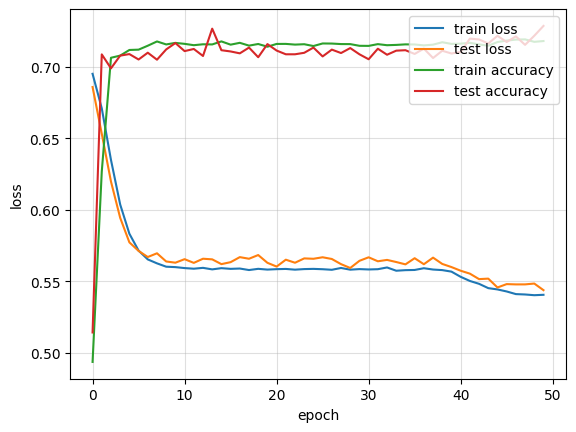

In [95]:
# 首次评估损失
plt.plot(list(range(0, num_epoch)), train_losses, label="train loss")
plt.plot(list(range(0, num_epoch)), test_losses, label="test loss")
plt.plot(list(range(0, num_epoch)), train_accuracy, label="train accuracy")
plt.plot(list(range(0, num_epoch)), test_accuracy, label="test accuracy")
plt.legend(loc='upper right')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(visible=True, alpha=0.4)
plt.show()

In [ ]:
# 首次提交计算分数
pred_and_submission(net=net, features=test_features, submission=True)

In [ ]:
# K折交叉验证+网格搜索 寻找最佳参数
from skorch import NeuralNetClassifier # 二分类任务
from sklearn.model_selection import GridSearchCV

def k_fold_and_grid_search() -> None:
    """K折交叉验证+网格搜索 寻找最佳参数
    """
    net = Net()
    model = NeuralNetClassifier(
        module=net,
        criterion=nn.CrossEntropyLoss,
        optimizer=torch.optim.Adam,
        device="cpu"
    ) # 使用skorch包装模型

    grid_param = {
        "batch_size": [50, 100, 150],
        'max_epochs': [50, 100, 150],
        'lr': [0.001, 0.01, 0.1]
    } # 网格超参

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid_param,
        cv=5,
        scoring="accuracy"
    )

    grid_search.fit(X=train_features.to("cpu"), y=train_labels.to("cpu"))

    print("最佳超参数：", grid_search.best_params_)
    print("最佳准确率：", grid_search.best_score_)

In [ ]:
# 第二次训练和预测（经过K-Fold+GridSearchCV超参优化）
# {'batch_size': 50, 'lr': 0.01, 'max_epochs': 50}
net = Net()
net.to("cuda")
train(
    net=net,
    features=train_features.to("cuda"),
    labels=train_labels.to("cuda"),
    test_features=None,
    test_labels=None,
    num_epochs=50,
    batch_size=50,
    lr=0.01
)
pred_and_submission(net=net, features=test_features, submission=True)

训练中:   0%|          | 0/50 [00:00<?, ?it/s]